## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Use a confusion matrix and compute accuracy.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [27]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

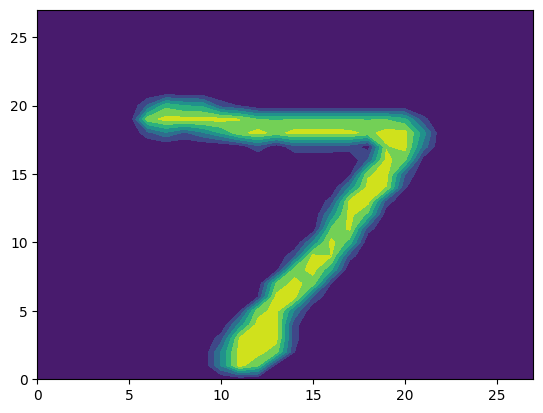

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

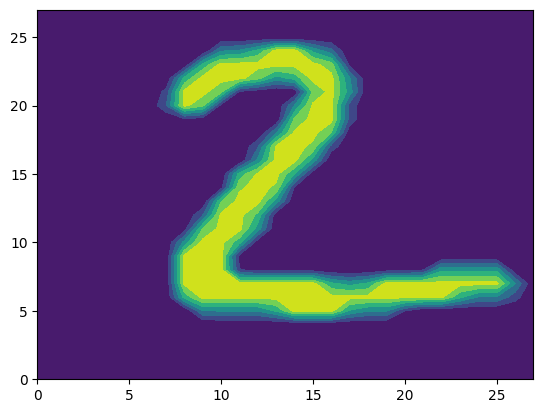

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

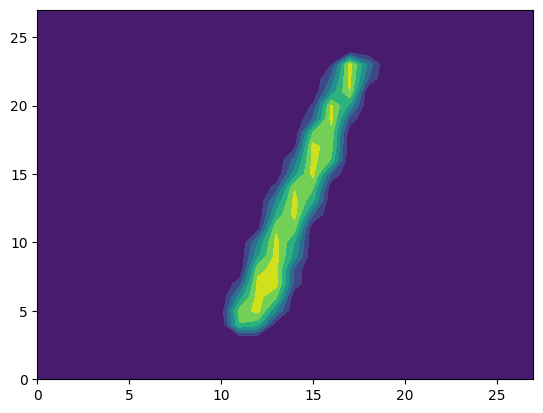

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

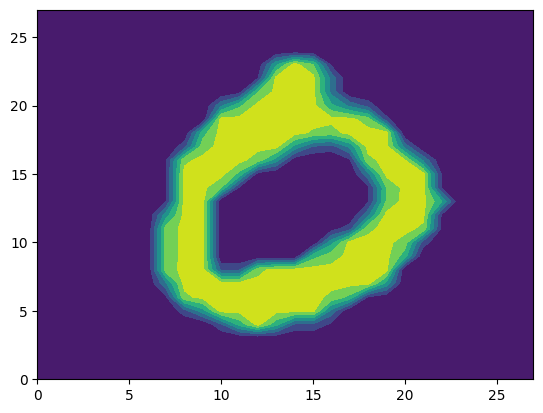

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

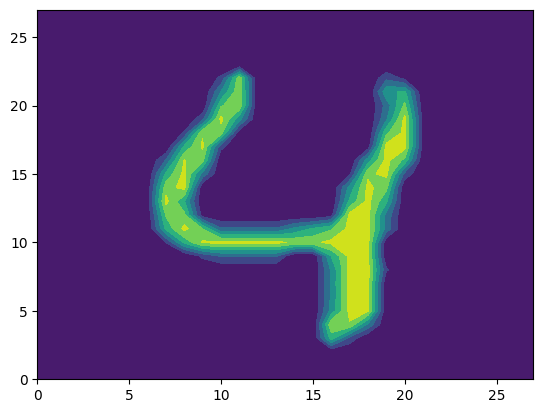

In [28]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

## **2.** What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [29]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


For X_train and X_test, there are 60,000 matrices that potrary a handwritten number. These matrices are each 28x28. Since y_test and y_train are vectors that tell you what number is written in the corresponding i in X_train and X_test, they are both 1D arrays with 60,000 and 10,000 indices respectively.

## **3.** Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the index-th element of X_test into a 28x28=784-length row vector of values, rather than a matrix. Turn X_train into an Nx784 matrix X that is suitable for scikit-learn's kNN classifier where N is the number of observations and 784 = 28*28 (you could use, for example, a for loop).

In [30]:
import pandas as pd
import numpy as np

# followed the professor's code after mine was taking too long each run without the "reload" conditional

# reload = 1

# if reload == 1:
#   vector_train = []
#   for i in range(60000):
#     vector = X_train[i].reshape((1,784))
#     vector_train.append(vector[0])
#   vector_train = pd.DataFrame(vector_train)
#   vector_train.to_csv('vector_train.csv')

#   vector_test = []
#   for i in range(10000):
#     vector = X_test[i].reshape((1,784))
#     vector_test.append(vector[0])
#   vector_test = pd.DataFrame(vector_test)
#   vector_test.to_csv('vector_test.csv')
# else:
#   vector_train = pd.read_csv('vector_train.csv')
#   vector_test = pd.read_csv('vector_test.csv')

Z_train = pd.read_parquet('/content/Z_train.parquet')
Z_test = pd.read_parquet('/content/Z_test.parquet')

## **4.** Use the reshaped X_test and y_test data to create a k-nearest neighbor classifier of digit. What is the optimal number of neighbors k? If you can't determine this, play around with different values of k for your classifier.

In [31]:
# from sklearn.neighbors import KNeighborsClassifier

# k_bar = 200
# SSE = np.zeros(k_bar)

# for k in range(k_bar):
#   model = KNeighborsClassifier(n_neighbors=k+1)
#   fitted_model = model.fit(vector_train.values, y_train)
#   y_hat = fitted_model.predict(vector_test.values)
#   SSE[k] = np.sum((y_train-y_hat)**2)

# SSE_min = np.min(SSE)
# min_index = np.where(SSE==SSE_min)
# k_star = min_index[0]+1
# print("The optimal k is: ", k_star)

from sklearn.neighbors import KNeighborsClassifier

# Determine the optimal k:
k_bar = 50
k_grid = np.arange(2,k_bar) # The range of k's to consider
accuracy = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    predictor = knn.fit(Z_train.values,y_train)
    #y_hat = predictor.predict(Z_test.values)
    accuracy[k] = knn.score(Z_test.values,y_test) # Bug in sklearn requires .values

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max)
k_star = k_grid[max_index] # Find the optimal value of k
print(k_star)

[4]


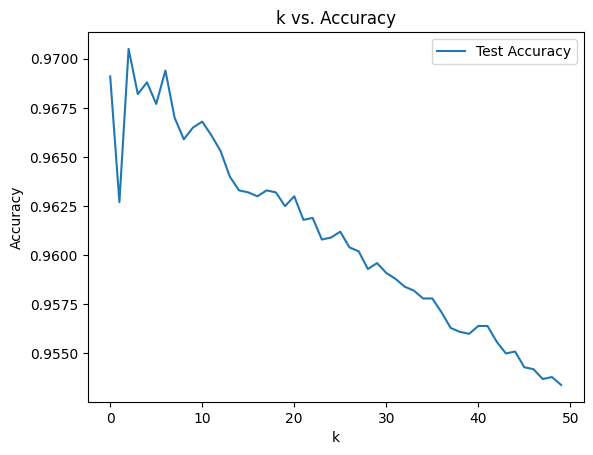

The optimal k: [4]


In [34]:
plt.plot(np.arange(0,k_bar),accuracy,label='Test Accuracy') # Plot accuracy by k
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('k vs. Accuracy')
plt.show()
print("The optimal k: " + str(k_star))

## **5.** For the optimal number of neighbors, how well does your predictor perform on the test set?

In [35]:
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(Z_train.values, y_train)
y_hat = fitted_model.predict(Z_test.values)

accuracy = model.score(Z_test.values, y_test)
print("Accuracy: ", accuracy)

pd.crosstab(y_test, y_hat)

Accuracy:  0.9682


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,976,1,1,0,0,1,0,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,11,8,993,1,1,0,0,16,2,0
3,0,2,5,979,1,10,1,7,2,3
4,3,9,0,0,952,0,4,1,0,13
5,4,0,0,17,2,862,5,1,0,1
6,6,3,0,0,4,3,942,0,0,0
7,0,23,5,0,5,0,0,988,0,7
8,9,3,5,16,6,19,5,5,902,4


## **6.** For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?

The most common mistake that occurred was 1s being confused at 7s. This makes sense because 1s can be written with a dash at the top, making them look like 7s. After that, it was 5s being confused as 8s and 3s being confused as 5s.

I found it interesting that the range of times when the algorithm confused numbers each other was a little slim, with the lowest number being 0 and the highest being 23. I was expecting, for example, 4s to be confused for 9s a lot more than say 5s were confused for 8s.

It was shocking to me that there was a pattern with 3s and 5s, as well as 5s and 8s, since I thought other mistakes would be more common.

## **7.** So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

RGB color codes indicate how much a color is tinted red, green, or blue. Essentially, it says how much of one of those colors was used to mix the color shown. To represent this in matrix form, 3 matrices could be made where each number matches to a pixel, one with the intensity of red indicated, the next with the intensity of green, and the last with the intensiry of blue. The matrices can then be converted into tabluar data by following a similar way we made the matrices in this lab into feature vectors. We changed the shape from n x m matrices to 1 x (n*m) vectors. The vectors are represented as a 2D array. Now, the data is no longer easily read by humans, but is still computer readable.